### Why predict rental prices? 
Firstly, this is an extension of my web scraping propertyguru project. After the data has been scraped, it is a natural progression to explore and model the relationships between the property features and the prices of high rise.This project aims to fill the gap and provide useful insights to property investors to help in their decision-making as to which high rise properties to purchase and rent out in order to maximize rental yield.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
%matplotlib inline

## Load dataset

In [2]:
df = pd.read_csv('High Rise Kuala Lumpur _ PropertyGuru Malaysia.csv')
df


,PropertyName,Address,Address.1,Price,bed,bath,Floorsize,Property_Type,Tenure,PSF,link
0,River Park Bangsar South,"Seksyen 98 Jalan Pantai Dalam, Pantai Dalam, B...","Seksyen 98 Jalan Pantai Dalam, Pantai Dalam, B...",NaN,2.0,2.0,812 sqft,Completion: 2026,Condominium,NaN,https://www.propertyguru.com.my/propertylistin...
1,Sunway Alishan Residences,"Cheras, Kuala Lumpur","Cheras, Kuala Lumpur",NaN,3.0,2.0,1216 sqft,Completion: 2025,Condominium,NaN,https://www.propertyguru.com.my/propertylistin...
2,Kondominium Greenpark,"Jalan Awan Pintal, Taman Yarl, Old Klang Road ...","Jalan Awan Pintal, Taman Yarl, Old Klang Road ...","360,000",3.0,2.0,1242 sqft,Condominium,Freehold,RM 289.86 psf,https://www.propertyguru.com.my/propertylistin...
3,Parkhill Residence Bukit Jalil,"Jalan Teknologi 1, Technology Park Malaysia, B...","Jalan Teknologi 1, Technology Park Malaysia, B...","580,000",3.0,2.0,1100 sqft,Condominium,Leasehold,RM 527.27 psf,https://www.propertyguru.com.my/propertylistin...
4,Setapak Next to MRT + Shopping Mall,"Setapak, Kuala Lumpur","Setapak, Kuala Lumpur","380,000",3.0,2.0,850 sqft,Condominium,NaN,RM 447.06 psf,https://www.propertyguru.com.my/propertylistin...
...,...,...,...,...,...,...,...,...,...,...,...
829,NaN,"No. 2 Jalan Sentul Indah, Sentul, Kuala Lumpur","No. 2 Jalan Sentul Indah, Sentul, Kuala Lumpur","580,000",3.0,2.0,1000 sqft,Condominium,Freehold,RM 580.00 psf,https://www.propertyguru.com.my/propertylistin...
830,NaN,"Jalan Bukit Angkasa Off Jalan Kerinchi, Kerinc...","Jalan Bukit Angkasa Off Jalan Kerinchi, Kerinc...","728,000",3.0,2.0,1209 sqft,Condominium,Freehold,RM 602.15 psf,https://www.propertyguru.com.my/propertylistin...
831,NaN,"No. 2 Jalan Sentul Indah, Sentul, Kuala Lumpur","No. 2 Jalan Sentul Indah, Sentul, Kuala Lumpur","620,000",3.0,3.0,1087 sqft,Condominium,Freehold,RM 570.38 psf,https://www.propertyguru.com.my/propertylistin...
832,NaN,"Jalan 2/109C, Taman Abadi Indah,OFF Jln Klang ...","Jalan 2/109C, Taman Abadi Indah,OFF Jln Klang ...","229,999",2.0,2.0,650 sqft,Apartment,Leasehold,RM 353.84 psf,https://www.propertyguru.com.my/propertylistin...


In [3]:
#Check the summary info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyName   679 non-null    object 
 1   Address        834 non-null    object 
 2   Address.1      834 non-null    object 
 3   Price          823 non-null    object 
 4   bed            828 non-null    float64
 5   bath           827 non-null    float64
 6   Floorsize      833 non-null    object 
 7   Property_Type  834 non-null    object 
 8   Tenure         781 non-null    object 
 9   PSF            806 non-null    object 
 10  link           834 non-null    object 
dtypes: float64(2), object(9)
memory usage: 71.8+ KB


## Drop Missing Value

In [4]:
#Check for null value
df.isnull().sum()

PropertyName     155
Address            0
Address.1          0
Price             11
bed                6
bath               7
Floorsize          1
Property_Type      0
Tenure            53
PSF               28
link               0
dtype: int64

In [5]:
df.shape

(834, 11)

## Data Preprocessing

In [6]:
#drop missing value
df = df.dropna()
df = df.reset_index(drop=True)

In [7]:
df.shape

(603, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PropertyName   603 non-null    object 
 1   Address        603 non-null    object 
 2   Address.1      603 non-null    object 
 3   Price          603 non-null    object 
 4   bed            603 non-null    float64
 5   bath           603 non-null    float64
 6   Floorsize      603 non-null    object 
 7   Property_Type  603 non-null    object 
 8   Tenure         603 non-null    object 
 9   PSF            603 non-null    object 
 10  link           603 non-null    object 
dtypes: float64(2), object(9)
memory usage: 51.9+ KB


In [9]:
#Drop Address from the dataframe
df =df.drop(['Address.1'],axis=1)


In [10]:
#Convert PSF dtype object to float type
df['PSF'] = df['PSF'].astype(str)
df['PSF'] = df['PSF'].apply(lambda x: x.replace('RM','').replace('psf','').replace(',','')).astype(float)


In [11]:
#Convert floorsize dtype object to float type
df['Price'] = df['Price'].astype(str)
df['Price'] = df['Price'].apply(lambda x:x.replace(',','').replace('RM',''))
df['Price'] = df['Price'].str.extract('(\d+)').astype(float)

In [12]:
#Convert floorsize dtype object to float type
df['Floorsize'] = df['Floorsize'].astype(str)
df['Floorsize'] = df['Floorsize'].apply(lambda x: x.replace('sqft',''))
df['Floorsize'] = df['Floorsize'].str.extract('(\d+)').astype(float)
df


,PropertyName,Address,Price,bed,bath,Floorsize,Property_Type,Tenure,PSF,link
0,Kondominium Greenpark,"Jalan Awan Pintal, Taman Yarl, Old Klang Road ...",360000.0,3.0,2.0,1242.0,Condominium,Freehold,289.86,https://www.propertyguru.com.my/propertylistin...
1,Parkhill Residence Bukit Jalil,"Jalan Teknologi 1, Technology Park Malaysia, B...",580000.0,3.0,2.0,1100.0,Condominium,Leasehold,527.27,https://www.propertyguru.com.my/propertylistin...
2,Damelia Suites RM230K【1st Home get 100% Loan】 ...,"Puchong, Kuala Lumpur",200000.0,2.0,2.0,500.0,Condominium,Freehold,400.00,https://www.propertyguru.com.my/propertylistin...
3,PSV 1 Residences @ Platinum South Valley,"Bandar Tasik Selatan, Kuala Lumpur",513000.0,3.0,2.0,946.0,Completion: 2027,Apartment,542.28,https://www.propertyguru.com.my/propertylistin...
4,5 Min to Mid Valley | Fully Furnished | RM3. 5...,"Taman UThant, Ampang Hilir, Kuala Lumpur",419999.0,3.0,2.0,1200.0,Condominium,Freehold,350.00,https://www.propertyguru.com.my/propertylistin...
...,...,...,...,...,...,...,...,...,...,...
598,The Holmes 2 @ Bandar Tun Razak,"Jalan Jujur, Bandar Tun Razak, Cheras, Kuala L...",430000.0,3.0,2.0,943.0,Condominium,Leasehold,455.99,https://www.propertyguru.com.my/propertylistin...
599,Le Yuan Residence,"Jalan 6/127a Off Jalan Senang Ria, Happy Garde...",829999.0,3.0,2.0,1400.0,Condominium,Freehold,592.86,https://www.propertyguru.com.my/propertylistin...
600,Le Yuan Residence,"Jalan 6/127a Off Jalan Senang Ria, Happy Garde...",900000.0,4.0,2.0,1535.0,Condominium,Freehold,586.32,https://www.propertyguru.com.my/propertylistin...
601,Gallery @ UThant,"Jalan Madge, Ampang Hilir, Kuala Lumpur",5800000.0,5.0,5.0,6576.0,Condominium,Freehold,882.00,https://www.propertyguru.com.my/propertylistin...


## Get District data

In [13]:
#Add lat & long into the dataframe
df['Latitude'] =np.nan
df['Longitude'] =np.nan

#Extract the district and state from the address and add into the dataframe
#District
df['District'] = df['Address'].astype(str)
df['District'] = df['Address'].apply(lambda x: x.split(',')[-2])
#State
df['State'] = df['Address'].apply(lambda x: x.split(',')[-1])
df.tail()

#Remove the initial space of some data in the District column
df['District'] = df['District'].apply(lambda x: x.lstrip())

# Split 'BukitJalil' into 'Bukit' and 'Jalil'
#df.loc[df['District'] == 'BukitJalil', 'District'] = 'Bukit Jalil'



In [14]:
df['District'].unique()

array(['Old Klang Road (Jalan Klang Lama)', 'Bukit Jalil', 'Puchong',
       'Bandar Tasik Selatan', 'Ampang Hilir', 'KL Sentral', 'Taman Desa',
       'Bandar Menjalara', 'Wangsa Maju', 'KL City', 'Mont Kiara',
       'Bangsar', 'Bangsar South', 'Sentul', 'Titiwangsa', 'Kuchai Lama',
       'Kepong', 'Mid Valley City', 'Damansara Heights', 'Setapak',
       'Setiawangsa', 'Cheras', 'Sri Hartamas', 'Pudu',
       'Taman Tun Dr Ismail', 'Sri Petaling', 'Desa ParkCity', 'Seputeh',
       'Salak Selatan', 'Keramat', 'Segambut', 'Bukit Tunku',
       'Country Heights Damansara', 'Sungai Besi', 'Taman Melawati',
       'Desa Pandan', 'Desa Petaling', 'Sungai Penchala'], dtype=object)

## Get the longtitude and latitude coordinate for each districts

In [15]:
# geolocator = Nominatim(user_agent="kl_explorer")
# location = []
# i=0
# for d in df['District']:
#     address = d+', Kuala Lumpur, MY'    
#     location.append(geolocator.geocode(address))
#     if location[i] is None:
#         print('Coordinates of ', d, ' are missing')
#     else :
#         print('Coordinates of ', d, ' are:', location[i].latitude, location[i].longitude)
#         df['Latitude'].iloc[i] = geolocator.geocode(address).latitude
#         df['Longitude'].iloc[i] = geolocator.geocode(address).longitude
#     i=i+1

In [16]:
# check for all the row which contains NaN value
nan_rows = df[df.isna().any(axis=1)]
nan_rows 

,PropertyName,Address,Price,bed,bath,Floorsize,Property_Type,Tenure,PSF,link,Latitude,Longitude,District,State
0,Kondominium Greenpark,"Jalan Awan Pintal, Taman Yarl, Old Klang Road ...",360000.0,3.0,2.0,1242.0,Condominium,Freehold,289.86,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Old Klang Road (Jalan Klang Lama),Kuala Lumpur
1,Parkhill Residence Bukit Jalil,"Jalan Teknologi 1, Technology Park Malaysia, B...",580000.0,3.0,2.0,1100.0,Condominium,Leasehold,527.27,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Bukit Jalil,Kuala Lumpur
2,Damelia Suites RM230K【1st Home get 100% Loan】 ...,"Puchong, Kuala Lumpur",200000.0,2.0,2.0,500.0,Condominium,Freehold,400.00,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Puchong,Kuala Lumpur
3,PSV 1 Residences @ Platinum South Valley,"Bandar Tasik Selatan, Kuala Lumpur",513000.0,3.0,2.0,946.0,Completion: 2027,Apartment,542.28,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Bandar Tasik Selatan,Kuala Lumpur
4,5 Min to Mid Valley | Fully Furnished | RM3. 5...,"Taman UThant, Ampang Hilir, Kuala Lumpur",419999.0,3.0,2.0,1200.0,Condominium,Freehold,350.00,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Ampang Hilir,Kuala Lumpur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,The Holmes 2 @ Bandar Tun Razak,"Jalan Jujur, Bandar Tun Razak, Cheras, Kuala L...",430000.0,3.0,2.0,943.0,Condominium,Leasehold,455.99,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Cheras,Kuala Lumpur
599,Le Yuan Residence,"Jalan 6/127a Off Jalan Senang Ria, Happy Garde...",829999.0,3.0,2.0,1400.0,Condominium,Freehold,592.86,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Kuchai Lama,Kuala Lumpur
600,Le Yuan Residence,"Jalan 6/127a Off Jalan Senang Ria, Happy Garde...",900000.0,4.0,2.0,1535.0,Condominium,Freehold,586.32,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Kuchai Lama,Kuala Lumpur
601,Gallery @ UThant,"Jalan Madge, Ampang Hilir, Kuala Lumpur",5800000.0,5.0,5.0,6576.0,Condominium,Freehold,882.00,https://www.propertyguru.com.my/propertylistin...,NaN,NaN,Ampang Hilir,Kuala Lumpur


In [17]:
# #missing KL City & Old Klang Road (Jalan Klang Lama) coordinates, we will add that value manually
# df.loc[(df['District'] == 'KL City','Latitude')] = geolocator.geocode('KL City').latitude
# df.loc[(df['District'] == 'KL City','Longitude')] = geolocator.geocode('KL City').longitude

# df.loc[(df['District'] == ' KL City','Latitude')] = geolocator.geocode(' KL City').latitude
# df.loc[(df['District'] == ' KL City','Longitude')] = geolocator.geocode(' KL City').longitude

# df.loc[(df['District'] == 'Old Klang Road (Jalan Klang Lama)','Latitude')] = geolocator.geocode('Old Klang Road (Jalan Klang Lama)').latitude
# df.loc[(df['District'] == 'Old Klang Road (Jalan Klang Lama)','Longitude')] = geolocator.geocode('Old Klang Road (Jalan Klang Lama)').longitude

# df.loc[(df['District'] == ' Old Klang Road (Jalan Klang Lama)','Latitude')] = geolocator.geocode(' Old Klang Road (Jalan Klang Lama)').latitude
# df.loc[(df['District'] == ' Old Klang Road (Jalan Klang Lama)','Longitude')] = geolocator.geocode(' Old Klang Road (Jalan Klang Lama)').longitude


In [18]:
#Save Preprocessed Data
#df.to_csv('df_PG_Preprocessed.csv')
df2 = pd.read_csv('df_PG_Preprocessed.csv')
df2 = df2.drop(['Unnamed: 0'],axis=1)
df2.head()

,PropertyName,Address,Price,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type,Tenure,PSF,link,Latitude,Longitude,District,State
0,Kondominium Greenpark,"Jalan Awan Pintal, Taman Yarl, Old Klang Road ...",360000,3,2,1242,Condominium,Freehold,289.86,https://www.propertyguru.com.my/propertylistin...,3.098280,101.676208,Old Klang Road (Jalan Klang Lama),Kuala Lumpur
1,Parkhill Residence Bukit Jalil,"Jalan Teknologi 1, Technology Park Malaysia, B...",580000,3,2,1100,Condominium,Leasehold,527.27,https://www.propertyguru.com.my/propertylistin...,3.053346,101.680294,Bukit Jalil,Kuala Lumpur
2,Damelia Suites RM230K【1st Home get 100% Loan】 ...,"Puchong, Kuala Lumpur",200000,2,2,500,Condominium,Freehold,400.00,https://www.propertyguru.com.my/propertylistin...,3.064027,101.649847,Puchong,Kuala Lumpur
3,PSV 1 Residences @ Platinum South Valley,"Bandar Tasik Selatan, Kuala Lumpur",513000,3,2,946,New Project,Unknown,542.28,https://www.propertyguru.com.my/propertylistin...,3.076097,101.711447,Bandar Tasik Selatan,Kuala Lumpur
4,5 Min to Mid Valley | Fully Furnished | RM3. 5...,"Taman UThant, Ampang Hilir, Kuala Lumpur",419999,3,2,1200,Condominium,Freehold,350.00,https://www.propertyguru.com.my/propertylistin...,3.158521,101.740186,Ampang Hilir,Kuala Lumpur


In [19]:
#Property_Type column of the dataset has many categories and we need to reduce the categories for better modelling
df2['Property_Type'].unique()

array(['Condominium', 'New Project', 'Apartment', 'Flat'], dtype=object)

In [20]:
#Group all the Completion Years together and call them 'Unknown'
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2021','New Project',df2['Property_Type'])
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2022','New Project', df2['Property_Type'])
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2023','New Project',df2['Property_Type'])
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2024','New Project',df2['Property_Type'])
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2025','New Project',df2['Property_Type'])
df2['Property_Type']=np.where(df['Property_Type']=='Completion: 2027','New Project',df2['Property_Type'])

In [21]:
df2['Property_Type'].unique()

array(['Condominium', 'New Project', 'Apartment', 'Flat'], dtype=object)

In [22]:
#Tenure column of the dataset has many categories and we need to reduce the categories for better modelling
df2['Tenure'].unique()

array(['Freehold', 'Leasehold', 'Unknown'], dtype=object)

In [23]:
#Group all the Apartment,Condominium and Completion Year together and call them 'New Project'
df2['Tenure'] = np.where(df2['Tenure']=='Apartment','Unknown',df2['Tenure'])
df2['Tenure'] = np.where(df2['Tenure']=='Condominium','Unknown',df2['Tenure'])
df2['Tenure'] = np.where(df2['Tenure']=='Completion: 2021','Unknown',df2['Tenure'])
df2['Tenure'] = np.where(df2['Tenure']=='Completion: 2023','Unknown',df2['Tenure'])

In [24]:
df2['Tenure'].value_counts()

Freehold     376
Leasehold    136
Unknown       91
Name: Tenure, dtype: int64

In [25]:
df2['No_Bathrooms'].value_counts()

2    356
3    106
1     53
4     47
5     29
6     10
8      2
Name: No_Bathrooms, dtype: int64

In [26]:
df2['No_Bedrooms'].value_counts()

3    337
4    109
2     99
1     29
5     24
6      5
Name: No_Bedrooms, dtype: int64

In [27]:
df2['PropertyName'].value_counts()

TRX Residence                                                                                          15
The Legacy OUG                                                                                         11
Pavilion Damansara Heights                                                                             11
Scenaria @ North Kiara Hills                                                                            9
Le Yuan Residence                                                                                       8
                                                                                                       ..
Residensi Sefina Mont Kiara                                                                             1
Twins @ Damansara Heights                                                                               1
Kiaramas Ayuria                                                                                         1
Pangsapuri Melur (Sentul)                     

In [28]:
df2['Property_Type'].value_counts()

Condominium    475
New Project     89
Apartment       36
Flat             3
Name: Property_Type, dtype: int64

## EDA

### Create KL map with the district data

In [29]:
import folium

# create map of Tashkent using latitude and longitude values
address = "Kuala Lumpur, MY"
geolocator = Nominatim(user_agent="kl_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
map_kl = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, district in zip(df2['Latitude'], df2['Longitude'], df2['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_kl)  
    
map_kl

### How does district affect the price of the KL properties?

In [30]:
kl_Dis = df2.groupby('District').mean().sort_values(by='Price', ascending=False).reset_index()
kl_Dis

,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude
0,Damansara Heights,2.940053e+06,2.777778,2.777778,1748.000000,1608.190556,3.152395,101.658445
1,Bukit Tunku,2.638766e+06,4.000000,4.166667,3890.333333,624.371667,3.166581,101.680668
2,Ampang Hilir,2.445346e+06,3.714286,3.714286,2842.285714,773.214286,3.158521,101.740186
3,Mont Kiara,1.307814e+06,3.104478,2.895522,1724.014925,745.401343,3.169999,101.652147
4,Bangsar,1.257283e+06,2.705882,2.529412,1524.823529,765.397647,3.130830,101.669440
5,KL City,1.189315e+06,2.563830,2.148936,1219.989362,1032.064574,47.377654,8.538495
6,Taman Tun Dr Ismail,1.184000e+06,3.428571,3.428571,1805.142857,643.648571,3.150808,101.624919
7,Desa ParkCity,1.164700e+06,2.950000,2.450000,1344.600000,842.564500,3.186383,101.631816
8,Country Heights Damansara,9.300000e+05,3.000000,2.500000,1472.500000,633.285000,3.178056,101.631221
9,Titiwangsa,9.142857e+05,3.142857,2.857143,1591.285714,637.050000,3.174011,101.695618


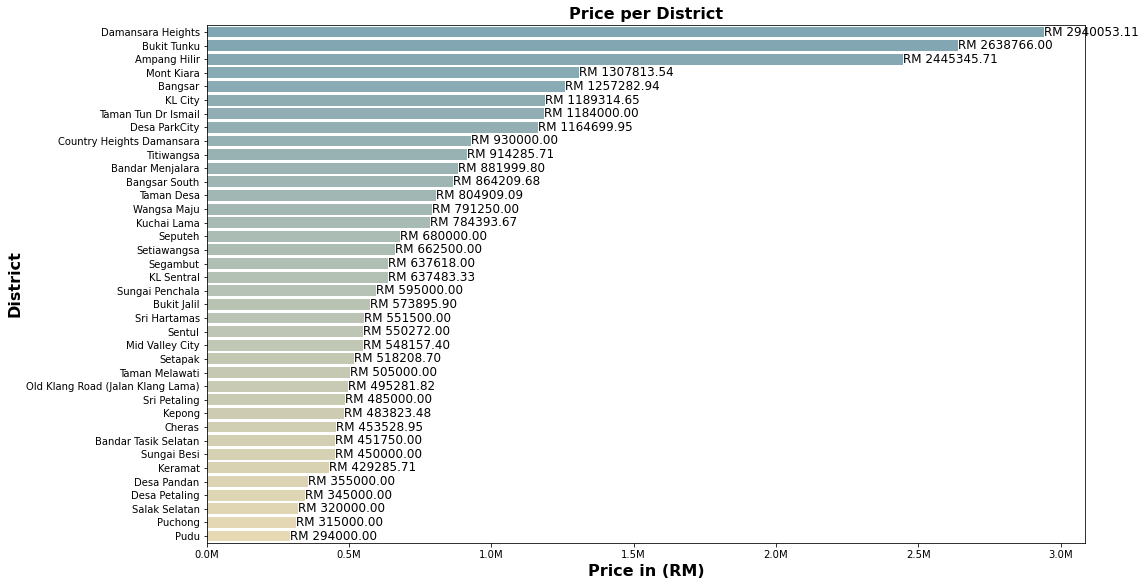

In [31]:
import matplotlib.ticker as ticker

plt.figure(figsize=(16,8))
ax= sns.barplot(data=kl_Dis, x='Price',y='District',palette='blend:#7AB,#EDA')

def format_x_axis_millions(value, tick_number):
    return '{:.1f}M'.format(value/1000000)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis_millions))

for bars in ax.containers:
     ax.bar_label(bars, fontsize=12, fmt='RM %.2f')
ax.set_xlabel('Price in (RM)', fontsize=16, weight='bold')
ax.set_ylabel('District', fontsize=16, weight='bold')
plt.tight_layout()
plt.title('Price per District',fontsize=16,weight='bold')
plt.show()


### How does district affect the Price per Square Foot of the KL properties?

In [32]:
kl_PSF = df2.groupby('District').mean()['PSF'].reset_index()
kl_PSF = kl_PSF.sort_values(by='PSF',ascending=False).reset_index().drop('index',axis=1)
kl_PSF

,District,PSF
0,Damansara Heights,1608.190556
1,KL City,1032.064574
2,Desa ParkCity,842.564500
3,Ampang Hilir,773.214286
4,Bangsar,765.397647
5,Mont Kiara,745.401343
6,KL Sentral,652.518333
7,Taman Tun Dr Ismail,643.648571
8,Titiwangsa,637.050000
9,Country Heights Damansara,633.285000


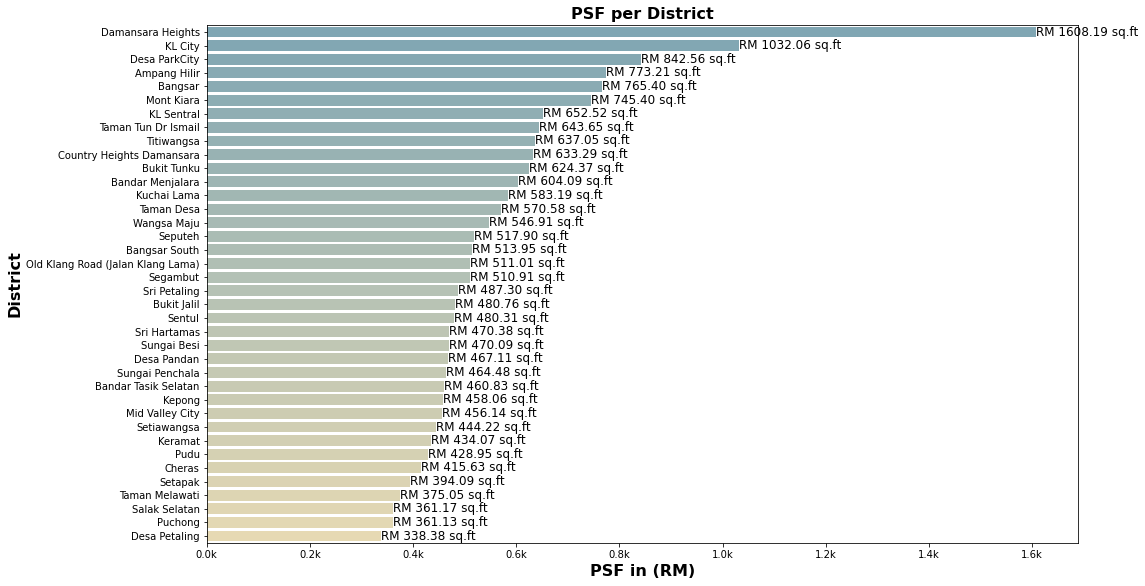

In [33]:
plt.figure(figsize=(16,8))
ax=sns.barplot(data=kl_PSF, x='PSF', y='District', palette='blend:#7AB,#EDA')

def format_x_axis_thousands(value,tick_number):
    return '{:.1f}k'.format(value/1000)

ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_x_axis_thousands))

for bars in ax.containers:
    ax.bar_label(bars,fontsize=12, fmt='RM %.2f sq.ft')

ax.set_xlabel('PSF in (RM)', fontsize=16, weight='bold')
ax.set_ylabel('District', fontsize=16, weight='bold')
plt.tight_layout()
plt.title('PSF per District',fontsize=16,weight='bold')
plt.show()

### Most common Property Type per district

Text(0.5, 1.0, 'Property Building Count')

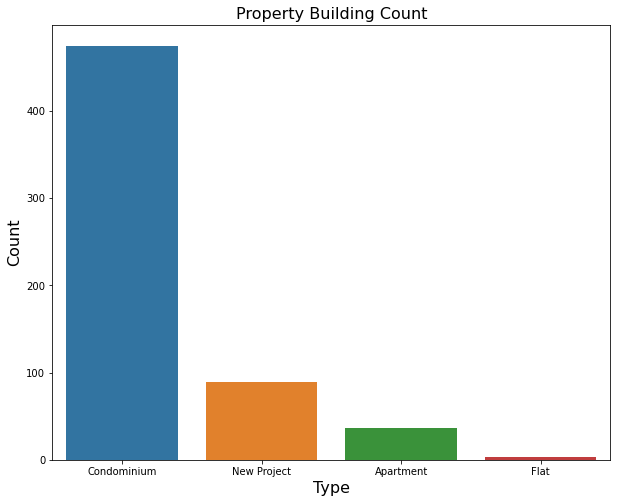

In [34]:
#visualize using countplot

plt.figure(figsize=(10,8))
sns.countplot(data=df2, x='Property_Type')
plt.xlabel('Type',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Property Building Count',fontsize=16)

<AxesSubplot:xlabel='Property_Type', ylabel='District'>

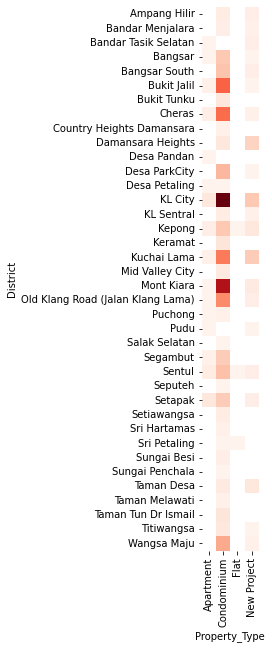

In [35]:
kl_Property_Type = df2.groupby(['District', 'Property_Type']).size().reset_index(name='counts')

kl_Property_Type = kl_Property_Type.pivot(index='District', columns='Property_Type', values='counts')
kl_Property_Type
#Visualize using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data=kl_Property_Type,square=True, vmin=0, cmap='Reds',cbar=False)

KL city district and Mont Kiara district has the highest number of condominiums.

## Create visualization for all the feature using scatter plot

Text(0.5, 0, 'Price in (RM)')

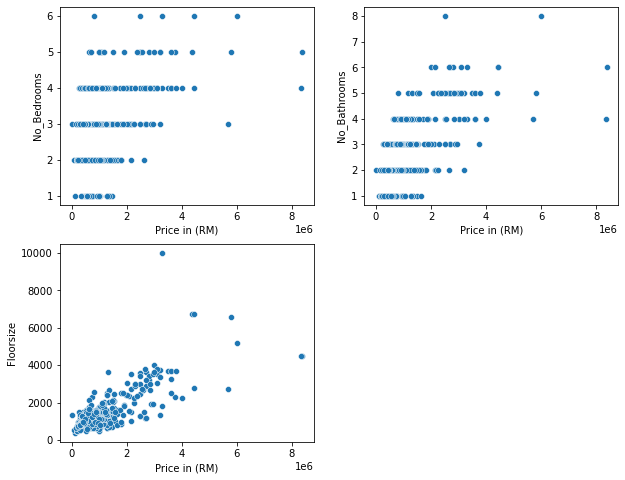

In [36]:
#visualize the relationship using scatterplot

#Number Bedrooms
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.scatterplot(data=df2, x='Price', y='No_Bedrooms')
plt.xlabel('Price in (RM)')

#Number Bathrooms
plt.subplot(2,2,2)
sns.scatterplot(data=df2, x='Price', y='No_Bathrooms')
plt.xlabel('Price in (RM)')

#Number Bathrooms
plt.subplot(2,2,3)
sns.scatterplot(data=df2, x='Price', y='Floorsize')
plt.xlabel('Price in (RM)')


In [37]:
correlation = df2.corr()
correlation 

,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude
Price,1.000000,0.389353,0.654121,0.762690,0.617290,0.118611,-0.118416
No_Bedrooms,0.389353,1.000000,0.733980,0.635377,-0.193136,-0.225598,0.225765
No_Bathrooms,0.654121,0.733980,1.000000,0.786640,0.103360,-0.129215,0.129299
Floorsize,0.762690,0.635377,0.786640,1.000000,0.112745,-0.062944,0.063131
PSF,0.617290,-0.193136,0.103360,0.112745,1.000000,0.396888,-0.396821
Latitude,0.118611,-0.225598,-0.129215,-0.062944,0.396888,1.000000,-0.999996
Longitude,-0.118416,0.225765,0.129299,0.063131,-0.396821,-0.999996,1.000000


<AxesSubplot:>

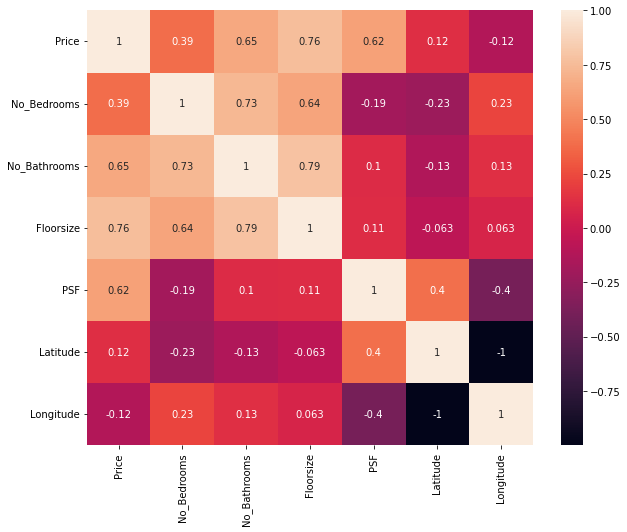

In [38]:
#visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True) 

Number of Bathroom, number of bedrooms, floorsize and PSF showed strong positive correlation with the Price.

## Onehot encoding

In [39]:
#create the one-hot encoded columns and then drop the unwanted columns.
property_kl = pd.get_dummies(df2, columns=['Property_Type'],prefix=['Type'])

property_kl = property_kl.drop(columns=['PropertyName','Address','link'],axis=1)
property_kl.head()

,Price,No_Bedrooms,No_Bathrooms,Floorsize,Tenure,PSF,Latitude,Longitude,District,State,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
0,360000,3,2,1242,Freehold,289.86,3.098280,101.676208,Old Klang Road (Jalan Klang Lama),Kuala Lumpur,0,1,0,0
1,580000,3,2,1100,Leasehold,527.27,3.053346,101.680294,Bukit Jalil,Kuala Lumpur,0,1,0,0
2,200000,2,2,500,Freehold,400.00,3.064027,101.649847,Puchong,Kuala Lumpur,0,1,0,0
3,513000,3,2,946,Unknown,542.28,3.076097,101.711447,Bandar Tasik Selatan,Kuala Lumpur,0,0,0,1
4,419999,3,2,1200,Freehold,350.00,3.158521,101.740186,Ampang Hilir,Kuala Lumpur,0,1,0,0


In [40]:
#Group the district and taking the mean of the features
kl_grouped = property_kl.groupby('District').mean().reset_index()
kl_grouped 

,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
0,Ampang Hilir,2.445346e+06,3.714286,3.714286,2842.285714,773.214286,3.158521,101.740186,0.000000,0.571429,0.00,0.428571
1,Bandar Menjalara,8.819998e+05,3.200000,2.600000,1437.400000,604.094000,3.194134,101.627228,0.000000,0.600000,0.00,0.400000
2,Bandar Tasik Selatan,4.517500e+05,3.250000,2.000000,982.750000,460.832500,3.076097,101.711447,0.250000,0.000000,0.00,0.750000
3,Bangsar,1.257283e+06,2.705882,2.529412,1524.823529,765.397647,3.130830,101.669440,0.058824,0.882353,0.00,0.058824
4,Bangsar South,8.642097e+05,3.263158,2.894737,1578.894737,513.953158,3.112973,101.666729,0.000000,0.842105,0.00,0.157895
5,Bukit Jalil,5.738959e+05,3.048780,2.365854,1194.121951,480.756829,3.053346,101.680294,0.048780,0.926829,0.00,0.024390
6,Bukit Tunku,2.638766e+06,4.000000,4.166667,3890.333333,624.371667,3.166581,101.680668,0.000000,1.000000,0.00,0.000000
7,Cheras,4.535290e+05,3.024390,2.121951,1109.170732,415.628049,3.099192,101.737423,0.073171,0.878049,0.00,0.048780
8,Country Heights Damansara,9.300000e+05,3.000000,2.500000,1472.500000,633.285000,3.178056,101.631221,0.000000,1.000000,0.00,0.000000
9,Damansara Heights,2.940053e+06,2.777778,2.777778,1748.000000,1608.190556,3.152395,101.658445,0.000000,0.333333,0.00,0.666667


## Clustering

In [41]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

C:\Users\ACER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ACER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=101), k=(1, 10))

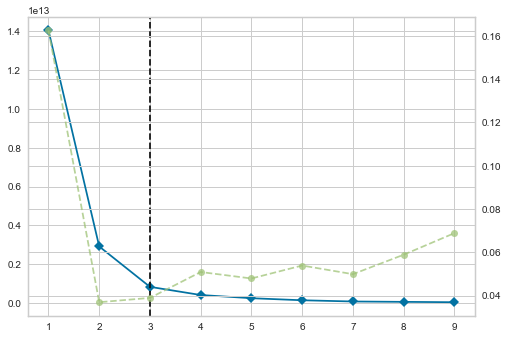

In [42]:
kl_grouped_clustering = kl_grouped.drop(columns=['District'],axis=1)
kl_grouped_clustering

model = KMeans(random_state=101)
visualize = KElbowVisualizer(model,k=(1,10))
visualize.fit(kl_grouped_clustering)

In [43]:
kcluster = 4

kmeans= KMeans(n_clusters=kcluster,random_state=101)

kmeans.fit(kl_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

C:\Users\ACER\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 0, 3, 2, 0, 1, 0, 2, 1, 0, 3, 0, 3, 2, 0, 0, 2, 0, 3, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 3, 2, 2])

In [44]:
#insert into kl_grouped
kl_grouped.insert(0,'Cluster Labels',kmeans.labels_)

In [45]:
kl_grouped.head()

,Cluster Labels,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
0,1,Ampang Hilir,2.445346e+06,3.714286,3.714286,2842.285714,773.214286,3.158521,101.740186,0.000000,0.571429,0.0,0.428571
1,2,Bandar Menjalara,8.819998e+05,3.200000,2.600000,1437.400000,604.094000,3.194134,101.627228,0.000000,0.600000,0.0,0.400000
2,0,Bandar Tasik Selatan,4.517500e+05,3.250000,2.000000,982.750000,460.832500,3.076097,101.711447,0.250000,0.000000,0.0,0.750000
3,3,Bangsar,1.257283e+06,2.705882,2.529412,1524.823529,765.397647,3.130830,101.669440,0.058824,0.882353,0.0,0.058824
4,2,Bangsar South,8.642097e+05,3.263158,2.894737,1578.894737,513.953158,3.112973,101.666729,0.000000,0.842105,0.0,0.157895


In [46]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kcluster)
ys = [i + x + (i*x)**2 for i in range(kcluster)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(kl_grouped['Latitude'], kl_grouped['Longitude'], kl_grouped['District'], kl_grouped['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=False,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine each cluster

In [47]:
#cluster 0 red circle
kl_grouped.loc[kl_grouped['Cluster Labels']==0]

,Cluster Labels,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
2,0,Bandar Tasik Selatan,451750.000000,3.250000,2.000000,982.750000,460.832500,3.076097,101.711447,0.250000,0.000000,0.00,0.750000
5,0,Bukit Jalil,573895.902439,3.048780,2.365854,1194.121951,480.756829,3.053346,101.680294,0.048780,0.926829,0.00,0.024390
7,0,Cheras,453528.951220,3.024390,2.121951,1109.170732,415.628049,3.099192,101.737423,0.073171,0.878049,0.00,0.048780
10,0,Desa Pandan,355000.000000,3.000000,2.000000,760.000000,467.110000,3.148269,101.738075,1.000000,0.000000,0.00,0.000000
12,0,Desa Petaling,345000.000000,3.000000,2.000000,1019.000000,338.380000,3.084185,101.703552,0.500000,0.500000,0.00,0.000000
15,0,Kepong,483823.480000,2.960000,2.120000,1033.440000,458.058800,3.214029,101.634842,0.120000,0.600000,0.04,0.240000
16,0,Keramat,429285.714286,3.142857,2.000000,983.000000,434.072857,3.176985,101.749359,0.000000,1.000000,0.00,0.000000
18,0,Mid Valley City,548157.400000,3.000000,2.200000,1163.600000,456.136000,3.118506,101.676846,0.000000,1.000000,0.00,0.000000
20,0,Old Klang Road (Jalan Klang Lama),495281.818182,2.818182,2.060606,1012.696970,511.006061,3.098280,101.676208,0.030303,0.878788,0.00,0.090909
21,0,Puchong,315000.000000,3.000000,2.333333,939.333333,361.133333,3.064027,101.649847,0.333333,0.666667,0.00,0.000000


Cluster 0 is the biggest cluster that includes the district with properties for middle income families. The properties scatter all around the city and mostly condominium and mixture of apartment and flat from 600 to 1400 sqft consists of (2-3 bedrooms) and 2 bathrooms. The price per unit vary from RM300K to RM600K.

In [48]:
#cluster 1 yellow circle
kl_grouped.loc[kl_grouped['Cluster Labels']==1]

,Cluster Labels,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
0,1,Ampang Hilir,2.445346e+06,3.714286,3.714286,2842.285714,773.214286,3.158521,101.740186,0.0,0.571429,0.0,0.428571
6,1,Bukit Tunku,2.638766e+06,4.000000,4.166667,3890.333333,624.371667,3.166581,101.680668,0.0,1.000000,0.0,0.000000
9,1,Damansara Heights,2.940053e+06,2.777778,2.777778,1748.000000,1608.190556,3.152395,101.658445,0.0,0.333333,0.0,0.666667


This is a luxury districts with over 100% condominium properties. Properties in this area consists of average 3 to 4 rooms bedrooms and bathrooms respectively with a range of 1800 sqft to 4000 sqft of floorsize. The price for 1 unit is at least over RM 2.5 millions.

In [49]:
#cluster 2 teal circle
kl_grouped.loc[kl_grouped['Cluster Labels']==2]

,Cluster Labels,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
1,2,Bandar Menjalara,881999.800000,3.200000,2.600000,1437.400000,604.094000,3.194134,101.627228,0.000000,0.600000,0.0,0.400000
4,2,Bangsar South,864209.684211,3.263158,2.894737,1578.894737,513.953158,3.112973,101.666729,0.000000,0.842105,0.0,0.157895
8,2,Country Heights Damansara,930000.000000,3.000000,2.500000,1472.500000,633.285000,3.178056,101.631221,0.000000,1.000000,0.0,0.000000
14,2,KL Sentral,637483.333333,2.500000,2.000000,899.000000,652.518333,3.134307,101.686369,0.000000,0.666667,0.0,0.333333
17,2,Kuchai Lama,784393.673469,3.387755,2.795918,1323.897959,583.194898,3.089438,101.684676,0.040816,0.673469,0.0,0.285714
24,2,Segambut,637618.000000,3.437500,2.625000,1261.937500,510.912500,3.186442,101.664196,0.125000,0.875000,0.0,0.000000
26,2,Seputeh,680000.000000,3.000000,2.000000,1313.000000,517.900000,3.113687,101.681420,0.000000,1.000000,0.0,0.000000
28,2,Setiawangsa,662500.000000,3.250000,2.750000,1505.750000,444.215000,3.182777,101.745248,0.000000,1.000000,0.0,0.000000
33,2,Taman Desa,804909.090909,3.181818,2.636364,1355.545455,570.576364,3.103064,101.685021,0.000000,0.454545,0.0,0.545455
36,2,Titiwangsa,914285.714286,3.142857,2.857143,1591.285714,637.050000,3.174011,101.695618,0.000000,0.857143,0.0,0.142857


The second largest cluster which includes the districts with properties for middle income families. The properties in this area are mainly condominium with a mixture of apartment.The properties in this cluster are anywhere from  900 sqft to 1600 sqft floorsize with (2-3) bedrooms and (2-3) bathrooms. The price per unit vary from RM 650K to RM 950K.

In [50]:
#cluster 3 yellow circle
kl_grouped.loc[kl_grouped['Cluster Labels']==3]

,Cluster Labels,District,Price,No_Bedrooms,No_Bathrooms,Floorsize,PSF,Latitude,Longitude,Type_Apartment,Type_Condominium,Type_Flat,Type_New Project
3,3,Bangsar,1.257283e+06,2.705882,2.529412,1524.823529,765.397647,3.130830,101.669440,0.058824,0.882353,0.0,0.058824
11,3,Desa ParkCity,1.164700e+06,2.950000,2.450000,1344.600000,842.564500,3.186383,101.631816,0.000000,0.950000,0.0,0.050000
13,3,KL City,1.189315e+06,2.563830,2.148936,1219.989362,1032.064574,47.377654,8.538495,0.063830,0.776596,0.0,0.159574
19,3,Mont Kiara,1.307814e+06,3.104478,2.895522,1724.014925,745.401343,3.169999,101.652147,0.014925,0.910448,0.0,0.074627
35,3,Taman Tun Dr Ismail,1.184000e+06,3.428571,3.428571,1805.142857,643.648571,3.150808,101.624919,0.000000,1.000000,0.0,0.000000


This 4 districts is for upper class income.Most of the properties here are condominiumns and apartment with average size of over 1200 sqft.Average price per unit is around RM 1.2 millions with (2-3) bedrooms and (2-3) bathrooms.

## Train and Build Models

We will build a model for training to predict Price & PSF. Our model will consists of district, No_Bedrooms, No_Bathrooms, Floorsize and PSF.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df2.columns

Index(['PropertyName', 'Address', 'Price', 'No_Bedrooms', 'No_Bathrooms',
       'Floorsize', 'Property_Type', 'Tenure', 'PSF', 'link', 'Latitude',
       'Longitude', 'District', 'State'],
      dtype='object')

In [53]:
df2['Property_Type'].unique()

array(['Condominium', 'New Project', 'Apartment', 'Flat'], dtype=object)

In [54]:
#Specifically remove entries with 'New Project' from Property_Type
df2= df2.loc[df2['Property_Type'] != 'New Project']

In [55]:
X = df2.drop(columns=['PropertyName', 'Address', 'Price', 'Tenure', 'PSF', 'link', 'Latitude',
       'Longitude', 'State','District'],axis=1)
y = df2['Price']

In [56]:
#We need to perform one hot encoding for the categorical variables by using pandas get_dummies()
X = pd.get_dummies(X)
X

,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type_Apartment,Property_Type_Condominium,Property_Type_Flat
0,3,2,1242,0,1,0
1,3,2,1100,0,1,0
2,2,2,500,0,1,0
4,3,2,1200,0,1,0
5,2,2,500,0,1,0
...,...,...,...,...,...,...
598,3,2,943,0,1,0
599,3,2,1400,0,1,0
600,4,2,1535,0,1,0
601,5,5,6576,0,1,0


In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 0 to 602
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   No_Bedrooms                514 non-null    int64
 1   No_Bathrooms               514 non-null    int64
 2   Floorsize                  514 non-null    int64
 3   Property_Type_Apartment    514 non-null    uint8
 4   Property_Type_Condominium  514 non-null    uint8
 5   Property_Type_Flat         514 non-null    uint8
dtypes: int64(3), uint8(3)
memory usage: 17.6 KB


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

## Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [60]:
reg = LinearRegression()

In [61]:
reg.fit(X_train, y_train)

LinearRegression()

## Predictions from our Model

In [62]:
#Make predictions
predictions = reg.predict(X_test)


In [63]:
#Calculate R-squared
lin_rg2 = r2_score(y_test, predictions)
print('Linear Regression R-squared: {}'.format(lin_rg2))

Linear Regression R-squared: 0.636292327075504


In [64]:
#calculate root mean squared error (RMSE)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print("Linear Regression RMSE: {}".format(rmse))

Linear Regression RMSE: 598196.2709788214


In [65]:
#calculate mean absolute error (MAE)
mae = mean_absolute_error(predictions, y_test)
print("Linear Regression MAE: {}".format(mae))

Linear Regression MAE: 301074.3782676139


C:\Users\ACER\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


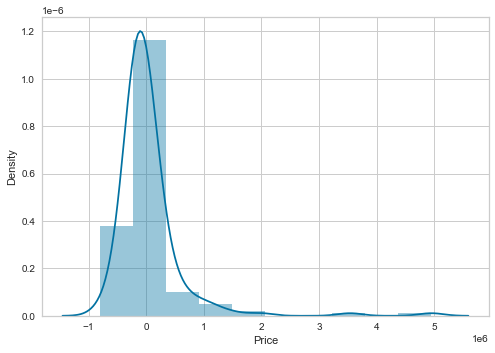

In [66]:
sns.distplot((y_test-predictions),bins=10);

In [67]:
coefficients = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coefficients

,Coefficient
No_Bedrooms,-213494.075975
No_Bathrooms,239766.450818
Floorsize,678.279322
Property_Type_Apartment,10729.881778
Property_Type_Condominium,105185.147071
Property_Type_Flat,-115915.028849


## Tensorflow keras

### Feature Scaling

In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
print(X_train.shape)
X_train.head()

(344, 6)


,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type_Apartment,Property_Type_Condominium,Property_Type_Flat
111,3,2,1313,0,1,0
97,4,2,1200,0,1,0
488,3,2,1100,0,1,0
214,4,4,1250,0,1,0
549,2,2,1159,0,1,0


In [70]:
print(X_test.shape)
X_test.head()

(170, 6)


,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type_Apartment,Property_Type_Condominium,Property_Type_Flat
237,3,2,1500,0,1,0
323,4,4,1754,0,1,0
106,2,2,708,0,1,0
361,3,3,1250,0,1,0
164,2,2,1145,1,0,0


In [71]:
scaler = MinMaxScaler(feature_range=(0,1))

In [72]:
#fit and transform the train set
X_train[['No_Bedrooms','No_Bathrooms','Floorsize']] = scaler.fit_transform(X_train[['No_Bedrooms','No_Bathrooms','Floorsize']])

In [73]:
#fit and transform the test set
X_test[['No_Bedrooms','No_Bathrooms','Floorsize']] = scaler.transform(X_test[['No_Bedrooms','No_Bathrooms','Floorsize']])

In [74]:
print(X_train.shape)
X_train.head()

(344, 6)


,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type_Apartment,Property_Type_Condominium,Property_Type_Flat
111,0.4,0.142857,0.097267,0,1,0
97,0.6,0.142857,0.085524,0,1,0
488,0.4,0.142857,0.075132,0,1,0
214,0.6,0.428571,0.090720,0,1,0
549,0.2,0.142857,0.081264,0,1,0


In [75]:
print(X_test.shape)
X_test.head()

(170, 6)


,No_Bedrooms,No_Bathrooms,Floorsize,Property_Type_Apartment,Property_Type_Condominium,Property_Type_Flat
237,0.4,0.142857,0.116700,0,1,0
323,0.6,0.428571,0.143095,0,1,0
106,0.2,0.142857,0.034397,0,1,0
361,0.4,0.285714,0.090720,0,1,0
164,0.2,0.142857,0.079809,1,0,0


## Create the model

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.optimizers import Adam

In [77]:
model = Sequential()

model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
#model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

## Training the Model

In [78]:
model.fit(x=X_train, y=y_train.values,
         validation_data=(X_test,y_test.values),
         batch_size=128,epochs=50)

Epoch 1/50
3/3 [==============================] - 1s 111ms/step - loss: 1627007090688.0000 - val_loss: 1768873656320.0000
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 1627006566400.0000 - val_loss: 1768873263104.0000
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 1627005911040.0000 - val_loss: 1768872607744.0000
Epoch 4/50
3/3 [==============================] - 0s 24ms/step - loss: 1627005386752.0000 - val_loss: 1768871821312.0000
Epoch 5/50
3/3 [==============================] - 0s 20ms/step - loss: 1627004600320.0000 - val_loss: 1768870772736.0000
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 1627003551744.0000 - val_loss: 1768869593088.0000
Epoch 7/50
3/3 [==============================] - 0s 17ms/step - loss: 1627002372096.0000 - val_loss: 1768868282368.0000
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 1627000799232.0000 - val_loss: 1768866316288.0000
Epoch 9/50
3/3 [===============

<AxesSubplot:>

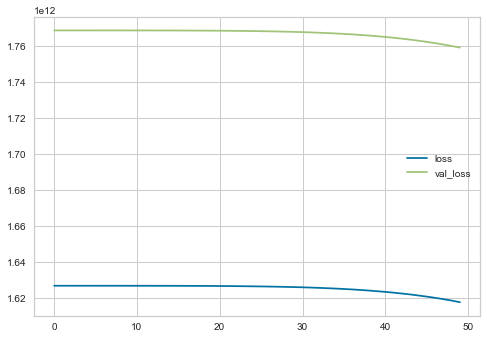

In [79]:
losses = pd.DataFrame(model.history.history)
losses.plot()

## Predict the values

In [80]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 1ms/step


## Evaluate the model

In [81]:
keras_mae = np.mean(np.abs(y_pred - y_test.values))
print("Testing set Mean Absolute Error: RM{}".format(keras_mae))

Testing set Mean Absolute Error: RM881073.1859748391


In [82]:
# Root Mean Squar error for model
keras_rmse = np.sqrt(np.mean(y_pred - y_test.values)**2)
print("Testing set Root Mean Squared Error: RM{}".format(keras_rmse))


Testing set Root Mean Squared Error: RM881073.1859748391


In [83]:
keras_r2 = r2_score(y_test, y_pred)

print("Tensorflow with Keras Sequential model R-squared: {}".format(keras_r2))

Tensorflow with Keras Sequential model R-squared: -0.7881804515102524


In this section, we will put together the results from our two models and compare them side by side in order to evaluate their performance. The metrics that we use for evaluation are R-squared, Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE).

R-squared
coefficient of determination
goodness-of-fit indicator
summarizes the explanatory power of the regression model
higher values are better


2. Root Mean Squared Error (RMSE) - square root of the average of squared differences between predictions and actual observations - lower values are better

3. Mean Absolute Error (MAE) - average of the absolute value of the difference between the forecasted values and the actual values - lower values are better

## Conclusion

Based on the two models we trained, Linear Regression has the highest R-squared value of 0.636 that is around 0.64% of the properties price. Whereas,R-squared value for Keras Sequential model is -0.788. Both of the model, using the same four features i.e 'No_Bedrooms','No_Bathrooms', 'Floorsize', and 'Property_Type'. This shows that there is no significant benefit of using neural network to solve this prices prediction problem.

### Suggestions for improvement


- collect transaction historical price for high rise properties
- collect more high rise properties from other parts of Malaysia 
- further scrape more detailed features from the property listing 
- create few type of model i.e RandomForest or Gradient Boosting